Connect with Google Drive to import files

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Install modules

In [0]:
!apt install proj-bin libproj-dev libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install netCDF4

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev libproj-dev proj-bin
0 upgraded, 3 newly installed, 0 to remove and 25 not upgraded.
Need to get 305 kB of archives.
After this operation, 1,706 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libproj-dev amd64 4.9.3-2 [199 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 305 kB in 1s (435 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144568 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Selecting previously unselected package libproj-dev:amd64.
Prepari

     |████████████████████████████████| 4.1MB 2.8MB/s 
     |████████████████████████████████| 327kB 35.4MB/s 


Import libraries and modules

In [0]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib
from mpl_toolkits.basemap import Basemap
from google.colab import files

# **1. EDGAR data**



The Emissions Database for Global Atmospheric Research (EDGAR) provides global past and present day anthropogenic emissions of greenhouse gases and air pollutants by country and on spatial grid.

EDGARv5.0 provides emissions of CO2 per sector and country. 

Source : https://edgar.jrc.ec.europa.eu/overview.php?v=50_GHG

CO2 emissions are provided separately: 
- CO2_excl_short-cycle_org_C includes all fossil CO2 sources, such as fossil fuel combustion, non-metallic mineral processes (e.g. cement production), metal (ferrous and non-ferrous) production processes, urea production, agricultural liming and solvents use. Large scale biomass burning with Savannah burning, forest fires, and sources and sinks from land-use, land-use change and forestry (LULUCF) are excluded.
- CO2_short-cycle_org_C represent short-cycle biomass burning (such as agricultura waste burning and Savannah burning)

For the energy related sectors the activity data is mainly based on the energy balance statistics of IEA (2017) (http://www.oecd-ilibrary.org/energy/co2-emissions-from-fuel-combustion-2017_co2_fuel-2017-en), whereas the activity data for the agricultural sectors originates mainly from FAO (2018) (http://www.fao.org/faostat/en/#home). Additional information can be found in Crippa et al. (2019).

The methodology for spatial allocation of emissions on 0.1 degree by 0.1degree grid cells is the following: A geographical database was built using spatial proxy datasets with the location of energy and manufacturing facilities, road networks, shipping routes, human and animal population density and agricultural land use, that vary over time. The input datasets where point, line and area grids at various resolutions and using GIS techniques for conversion, resampling and aggregation the dataset have been included on a 0.1°x0.1° grid. National sector totals are then distributed with the given percentages of the spatial proxies over the country’s area

Notes: Emission gridmaps are expressed in kg substance /m2 /s.

## 1.1 CO2 emissions excluding short-cycle biomass burning

CO2 emissions excluding short-cycle biomass burning (such as agricultural waste burning and Savannah burning) but including other biomass burning (such as forest fires, post-burn decay, peat fires and decay of drained peatlands). 

NB: Short-cycle biomass burning are, by convention, excluded from inventories because of the supposed carbon rotation speed for these emissions. However it is a convention and not a physical reality. 

Emissions are expressed in kg substance /m2 /s.

Annual data from 2013 to 2018. 

### 1.1.1 Import data

In [0]:
path_Edgar_2015_v1 = "/content/drive/My Drive/Data For Good/Inputs/EDGAR data/v50_CO2_excl_short-cycle_org_C_2015.0.1x0.1.nc"
path_Edgar_2016_v1 = "/content/drive/My Drive/Data For Good/Inputs/EDGAR data/v50_CO2_excl_short-cycle_org_C_2016.0.1x0.1.nc"
path_Edgar_2017_v1 = "/content/drive/My Drive/Data For Good/Inputs/EDGAR data/v50_CO2_excl_short-cycle_org_C_2017.0.1x0.1.nc"
path_Edgar_2018_v1 = "/content/drive/My Drive/Data For Good/Inputs/EDGAR data/v50_CO2_excl_short-cycle_org_C_2018.0.1x0.1.nc"

dataset_Edgar_2015_v1 = Dataset(path_Edgar_2015_v1, 'r')
dataset_Edgar_2016_v1 = Dataset(path_Edgar_2016_v1, 'r')
dataset_Edgar_2017_v1 = Dataset(path_Edgar_2017_v1, 'r')
dataset_Edgar_2018_v1 = Dataset(path_Edgar_2018_v1, 'r')

NameError: ignored

In [0]:
dataset_Edgar_2015_v1.variables.keys()

odict_keys(['lat', 'lon', 'emi_co2'])

In [0]:
dataset_Edgar_2015_v1.variables['lat'].shape

(1800,)

In [0]:
dataset_Edgar_2015_v1.variables['lon'].shape

(3600,)

In [0]:
dataset_Edgar_2015_v1.variables['emi_co2'].shape

(1800, 3600)

### 1.1.2 Transform into dataframe

In [0]:
dataset_list_v1 = [dataset_Edgar_2015_v1,dataset_Edgar_2016_v1,dataset_Edgar_2017_v1,dataset_Edgar_2018_v1]

In [0]:
dataframe_list_v1 = list()

for dataset in dataset_list_v1:
  arr_C02 = np.array(dataset.variables['emi_co2'])
  arr_lat = np.array(dataset.variables['lat'])
  arr_lon = np.array(dataset.variables['lon'])
  preparatory_table = np.zeros((arr_lat.size*arr_lon.size,3))
  
  for j in range(3600-1): 
    for i in range(1800-1): 
      preparatory_table[i+(1800*j),0]=arr_lat[i]
      preparatory_table[i+(1800*j),1]=arr_lon[j]
      preparatory_table[i+(1800*j),2]=arr_C02[i,j]
      i+1
    j+1
  
  dataframe_list_v1.append(pd.DataFrame(preparatory_table))
  

In [0]:
def decale(a):
    if (a > 180):
      return a-360
    return a

In [0]:
for dataframe in dataframe_list_v1:
  dataframe.columns = ['latitude', 'longitude', 'CO2 emissions']
  dataframe['longitude'] = dataframe['longitude'].apply(decale)

In [0]:
dataframe_list_v1[0]

,latitude,longitude,CO2 emissions
0,-89.949997,0.05,0.0
1,-89.849998,0.05,0.0
2,-89.750000,0.05,0.0
3,-89.650002,0.05,0.0
4,-89.550003,0.05,0.0
...,...,...,...
6479995,0.000000,0.00,0.0
6479996,0.000000,0.00,0.0
6479997,0.000000,0.00,0.0
6479998,0.000000,0.00,0.0


Création des dataframes

In [0]:
CO2_emissions_Edgar_2015_v1 = dataframe_list_v1[0]
CO2_emissions_Edgar_2016_v1 = dataframe_list_v1[1]
CO2_emissions_Edgar_2017_v1 = dataframe_list_v1[2]
CO2_emissions_Edgar_2018_v1 = dataframe_list_v1[3]

Vérification que les données changent d'une année à l'autre - seules les données 'CO2 emissions' sont sensées changer

In [0]:
CO2_emissions_Edgar_2015_v1.describe()

,latitude,longitude,CO2 emissions
count,6.480000e+06,6.480000e+06,6.480000e+06
mean,-4.995834e-02,1.387778e-05,1.819788e-09
std,5.191101e+01,1.038942e+02,9.246275e-08
min,-8.995000e+01,-1.799500e+02,0.000000e+00
25%,-4.495000e+01,-8.995001e+01,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.485000e+01,8.995000e+01,4.200186e-11
max,8.985000e+01,1.799500e+02,1.247735e-04


In [0]:
CO2_emissions_Edgar_2018_v1.describe()

,latitude,longitude,CO2 emissions
count,6.480000e+06,6.480000e+06,6.480000e+06
mean,-4.995834e-02,1.387778e-05,1.893313e-09
std,5.191101e+01,1.038942e+02,9.225375e-08
min,-8.995000e+01,-1.799500e+02,0.000000e+00
25%,-4.495000e+01,-8.995001e+01,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.485000e+01,8.995000e+01,4.428961e-11
max,8.985000e+01,1.799500e+02,1.208277e-04


### 1.1.3 Data visualisation

Rappel: l'unité est en kg substance /m2 /s

In [0]:
def draw_map_Edgar(data, titre, lon_min=-180, lon_max=180, lat_min=-90, lat_max=90, size_point=1, frontier=False):

    plt.figure(figsize=(15, 10), edgecolor='w')
    m = Basemap(llcrnrlat=lat_min, urcrnrlat=lat_max, llcrnrlon=lon_min, urcrnrlon=lon_max)
    
    m.shadedrelief()
        
    parallels = np.arange(-80.,81,10.)
    m.drawparallels(parallels,labels=[False,True,True,False])

    meridians = np.arange(10.,351.,20.)
    m.drawmeridians(meridians,labels=[True,False,False,True])

    normal = matplotlib.colors.LogNorm(vmax=data['CO2 emissions'].max())

    m.scatter(data['longitude'], data['latitude'], c=data['CO2 emissions'], cmap=plt.cm.jet, s=size_point, norm=normal)
    plt.colorbar()
    plt.title(titre)

    if (frontier):
      m.drawcountries(linewidth=0.5)
      m.drawcoastlines(linewidth=0.7)

    plt.show()

In [0]:
dataframe_list_final_v1 = (CO2_emissions_Edgar_2015_v1,CO2_emissions_Edgar_2016_v1,CO2_emissions_Edgar_2017_v1,CO2_emissions_Edgar_2018_v1)
title_list_Edgar_v1 = ('CO2 emissions of year 2013 v1','CO2 emissions of year 2014 v1','CO2 emissions of year 2015 v1','CO2 emissions of year 2016 v1','CO2 emissions of year 2017 v1','CO2 emissions of year 2018 v1')

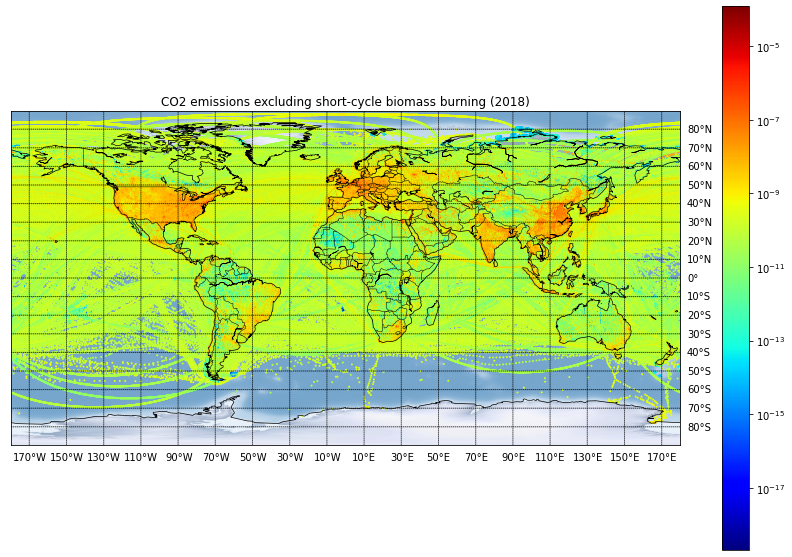

In [0]:
draw_map_Edgar(CO2_emissions_Edgar_2018_v1, 'CO2 emissions excluding short-cycle biomass burning (2018)', frontier=True)

### 1.1.4 Export data

In [0]:
#CO2_emissions_Edgar_2015_v1.to_csv("/content/drive/My Drive/Data For Good/Outputs/CO2_emissions_Edgar_2015_v1.csv")
#CO2_emissions_Edgar_2016_v1.to_csv("/content/drive/My Drive/Data For Good/Outputs/CO2_emissions_Edgar_2016_v1.csv")
#CO2_emissions_Edgar_2017_v1.to_csv("/content/drive/My Drive/Data For Good/Outputs/CO2_emissions_Edgar_2017_v1.csv")
#CO2_emissions_Edgar_2018_v1.to_csv("/content/drive/My Drive/Data For Good/Outputs/CO2_emissions_Edgar_2018_v1.csv")

## 1.2. CO2 emissions from short-cycle biomass burning

CO2 emissions from large scale biomass burning with Savannah burning, forest fires, and sources and sinks from land-use, land-use change and forestry (LULUCF). 

Annual data from 2013 to 2015 (no data available for the next years)

Emissions are expressed in kg substance /m2 /s.

### 1.2.1. Import data

In [0]:
path_Edgar_2015_v2 = "/content/drive/My Drive/Data For Good/Inputs/EDGAR data/v50_CO2_org_short-cycle_C_2015.0.1x0.1.nc"

dataset_Edgar_2015_v2 = Dataset(path_Edgar_2015_v2, 'r')

### 1.2.2 Transform into dataframe

In [0]:
dataset_list_v2 = [dataset_Edgar_2015_v2]

In [0]:
dataframe_list_v2 = list()

for dataset in dataset_list_v2:
  arr_C02 = np.array(dataset.variables['emi_co2'])
  arr_lat = np.array(dataset.variables['lat'])
  arr_lon = np.array(dataset.variables['lon'])
  preparatory_table = np.zeros((arr_lat.size*arr_lon.size,3))
  
  for j in range(3600-1): 
    for i in range(1800-1): 
      preparatory_table[i+(1800*j),0]=arr_lat[i]
      preparatory_table[i+(1800*j),1]=arr_lon[j]
      preparatory_table[i+(1800*j),2]=arr_C02[i,j]
      i+1
    j+1
  
  dataframe_list_v2.append(pd.DataFrame(preparatory_table))
  

In [0]:
for dataframe in dataframe_list_v2:
  dataframe.columns = ['latitude', 'longitude', 'CO2 emissions']
  dataframe['longitude'] = dataframe['longitude'].apply(decale)

Création des dataframes

In [0]:
CO2_emissions_Edgar_2015_v2 = dataframe_list_v2[0]

In [0]:
CO2_emissions_Edgar_2015_v2.describe()

,latitude,longitude,CO2 emissions
count,6.480000e+06,6.480000e+06,6.480000e+06
mean,-4.995834e-02,1.387778e-05,2.741960e-10
std,5.191101e+01,1.038942e+02,4.513424e-09
min,-8.995000e+01,-1.799500e+02,0.000000e+00
25%,-4.495000e+01,-8.995001e+01,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.485000e+01,8.995000e+01,0.000000e+00
max,8.985000e+01,1.799500e+02,2.792968e-06


Comparaison avec la v1

In [0]:
CO2_emissions_Edgar_2015_v1.describe()

,latitude,longitude,CO2 emissions
count,6.480000e+06,6.480000e+06,6.480000e+06
mean,-4.995834e-02,1.387778e-05,1.819788e-09
std,5.191101e+01,1.038942e+02,9.246275e-08
min,-8.995000e+01,-1.799500e+02,0.000000e+00
25%,-4.495000e+01,-8.995001e+01,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.485000e+01,8.995000e+01,4.200186e-11
max,8.985000e+01,1.799500e+02,1.247735e-04


On observe que les données en CO2 sont bien plus faibles dans la v2 par rapport à la v1 (facteur 10 pour la moyenne, facteur 100 pour le maximum) 

### 1.2.3 Data visualisation

Rappel: l'unité est en kg substance /m2 /s

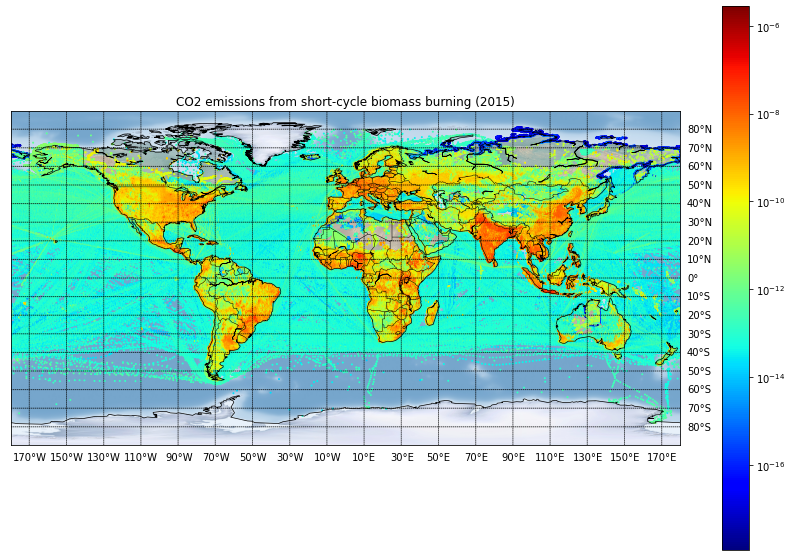

In [0]:
draw_map_Edgar(CO2_emissions_Edgar_2015_v2, 'CO2 emissions from short-cycle biomass burning (2015)', frontier=True)

### 1.2.4 Export data

In [0]:
#CO2_emissions_Edgar_2015_v2.to_csv("/content/drive/My Drive/Data For Good/Outputs/CO2_emissions_Edgar_2015_v2.csv")

## 1.3. Total CO2 emissions (including short-cycle biomass burning) - version of the data to be used

This version of the data results in the sum of CO2 emissions excluding short-cycle biomass burning (CO2_excl_short-cycle_org_C) and CO2 emissions from short-cycle biomass burning (CO2_short-cycle_org_C) in order to get the total CO2 emissions. 

NB: For year 2016 to 2018, CO2 emissions from short-cycle biomass burning are not available, hence can only provide CO2 emissions excluding short-cycle biomass burning for these years. This has not a big influence as data excluding short-cycle (v1) are 10 times bigger on average, and 100 times bigger as regards the maximum CO2 emissions compared to data concerning biomass burning (short-cycle, v2). Therefore, even when v2 has data, v3 ≈ v1
 
Emissions are expressed in kg substance /m2 /s.

### 1.3.1 Creation of the dataframes

For 2015 we sum the CO2 emissions excluding short-cycle biomass burning + CO2 emissions due to biomass burning.

For 2016, 2017 and 2018 we only have CO2 emissions excluding short-cycle biomass.

In [0]:
# 2015 

CO2_emissions_Edgar_2015_v3 = pd.DataFrame()
CO2_emissions_Edgar_2015_v3['latitude'] = CO2_emissions_Edgar_2015_v1['latitude']
CO2_emissions_Edgar_2015_v3['longitude'] = CO2_emissions_Edgar_2015_v1['longitude']
CO2_emissions_Edgar_2015_v3['CO2 emissions'] = CO2_emissions_Edgar_2015_v1['CO2 emissions'] + CO2_emissions_Edgar_2015_v2['CO2 emissions']

# 2016

CO2_emissions_Edgar_2016_v3 = CO2_emissions_Edgar_2016_v1

# 2017

CO2_emissions_Edgar_2017_v3 = CO2_emissions_Edgar_2017_v1

# 2018

CO2_emissions_Edgar_2018_v3 = CO2_emissions_Edgar_2018_v1

In [0]:
# Test colonne 'CO2 emissions' et leur moyenne
# On devrait obtenir des différences très petites, ce qui est le cas

print(CO2_emissions_Edgar_2015_v3.describe()['CO2 emissions'].iloc[1] -(CO2_emissions_Edgar_2015_v1.describe()['CO2 emissions'].iloc[1]+CO2_emissions_Edgar_2015_v2.describe()['CO2 emissions'].iloc[1]))

1.2407709188295415e-24


### 1.3.2 Data visualisation

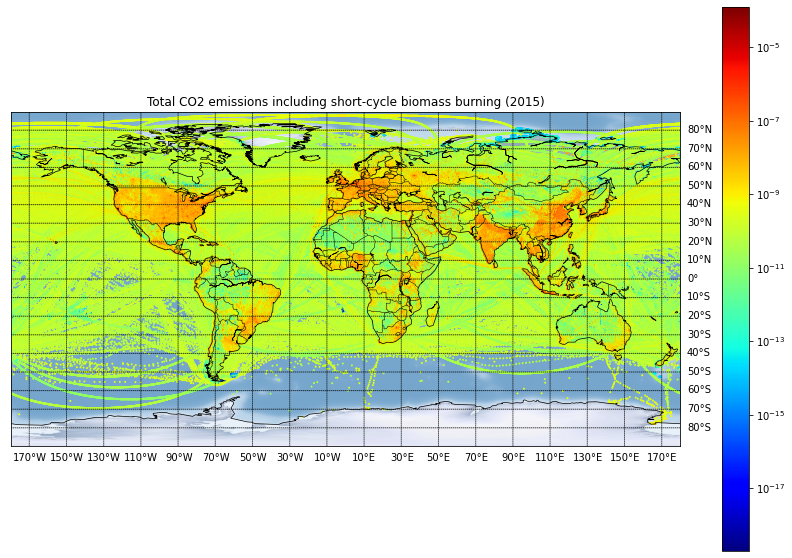

In [0]:
draw_map_Edgar(CO2_emissions_Edgar_2015_v3,'Total CO2 emissions including short-cycle biomass burning (2015)', frontier=True)

### 1.3.3 Classification of CO2 emissions

Visualisation of the data

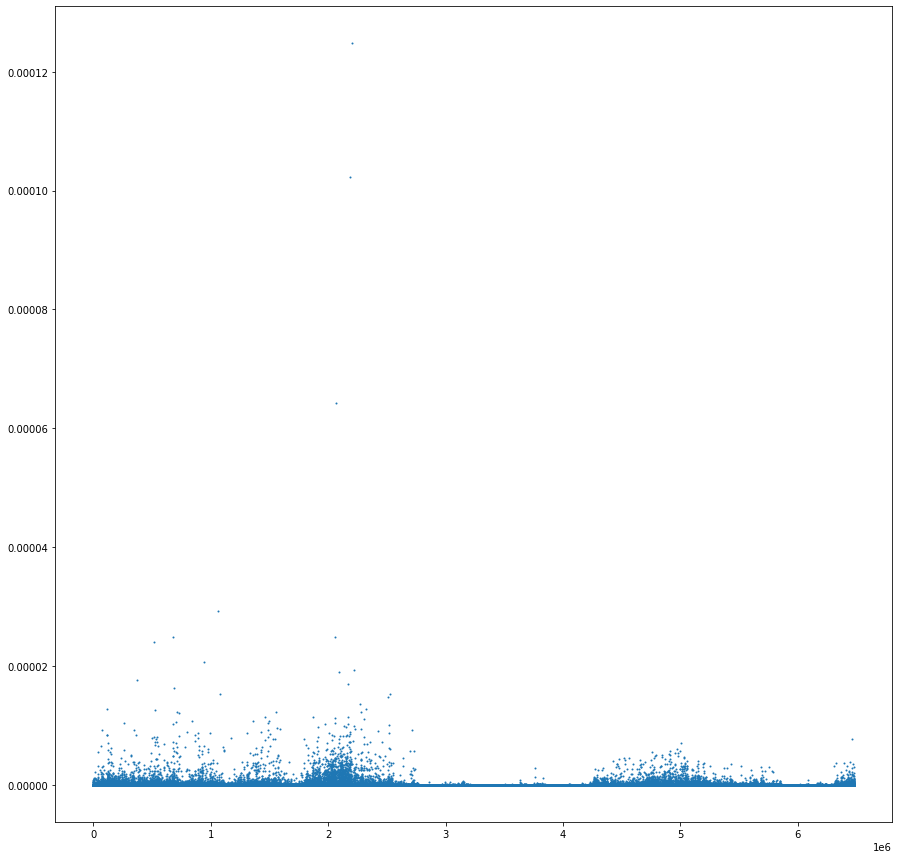

In [0]:
plt.figure(figsize=(15, 15))
plt.scatter(np.arange(0,6480000,1),CO2_emissions_Edgar_2015_v3['CO2 emissions'], s=1)

We observe that many data have a very small value.
Let's have a better view on the data repartition

In [0]:
list_percentile_2015=[]
for i in range(100):
    list_percentile_2015.append(np.percentile(CO2_emissions_Edgar_2015_v3['CO2 emissions'],i+1))

list_percentile_2015

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 5.290037400023931e-14,
 3.654687575791957e-12,
 8.743585716564084e-12,
 1.3949656516715147e-11,
 1.7852518768846057e-11,
 2.4661993827321264e-11,
 3.063932510483098e-11,
 3.7692256034274705e-11,
 4.5434782286701776e-11,
 5.423349573249747e-11,
 6.415975889462189e-11,
 7.479893671813323e-11,
 8.58178786212571e-11,
 9.831339160014437e-11,
 1.1312961709455432e-10,
 1.3064580859419725e-10,
 1.5113806048561618e-10,
 1.7705156727155254e-10,
 2.0630213684558977e-10,
 2.4003915260959857e-10,
 2.800839399297312e-10,
 3.31950116690355e-10,
 3.979949842998834e-10,
 4.805445269137627e-10,
 5.93037748262646e-10,
 7

We get a better idea on how to classify our data

Let's check if this is the same thing for 2016

In [0]:
list_percentile_2016=[]
for i in range(100):
    list_percentile_2016.append(np.percentile(CO2_emissions_Edgar_2016_v3['CO2 emissions'],i+1))

list_percentile_2016

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 6.366293164297418e-13,
 4.69950764067642e-12,
 9.325238827656497e-12,
 1.4069111153869327e-11,
 1.7156065752060857e-11,
 2.353322196835264e-11,
 2.967214685761774e-11,
 3.6049654997261065e-11,
 4.314634153429475e-11,
 5.096520663827598e-11,
 6.103007224589359e-11,
 7.078636982127406e-11,
 8.165488847577949e-11,
 9.288373542526429e-11,
 1.0680399155360566e-10,
 1.2323501025202072e-10,
 1.4132858772164525e-10,
 1.6463365115626548e-10,
 1.9254301902860122e-10,
 2.2441727642874554e-10,
 2.6164630823055637e-10,
 3.0888552826624505e-10,
 3.703807807675654e-10,
 4.488693583493162e-10,
 5.541750136561765

Creation of the classification

We chose the following classification after observing the 100 percentiles of the data:
- CO2 emissions = 0 (encoded 'Null' or 0)
- 0 < CO2 emissions <= 10^-10 (encoded 'Very low' or 1)
- 10^-10 < CO2 emissions <= 10^-9 (encoded 'Low' or 2)
- 10^-9 < CO2 emissions <= 10^-8 (encoded 'Medium' or 3)
- CO2 emissions > 10^-8 (encoded 'High' or 4)

In [0]:
# 2015
CO2_emissions_Edgar_2015_v3.loc[CO2_emissions_Edgar_2015_v3['CO2 emissions']==0, 'CO2 classification'] = 0
CO2_emissions_Edgar_2015_v3.loc[(CO2_emissions_Edgar_2015_v3['CO2 emissions'] > 0) & (CO2_emissions_Edgar_2015_v3['CO2 emissions'] <= 1.0e-10), 'CO2 classification'] = 1
CO2_emissions_Edgar_2015_v3.loc[(CO2_emissions_Edgar_2015_v3['CO2 emissions'] > 1.0e-10) & (CO2_emissions_Edgar_2015_v3['CO2 emissions'] <= 1.0e-9), 'CO2 classification'] = 2
CO2_emissions_Edgar_2015_v3.loc[(CO2_emissions_Edgar_2015_v3['CO2 emissions'] > 1.0e-9) & (CO2_emissions_Edgar_2015_v3['CO2 emissions'] <= 1.0e-8), 'CO2 classification'] = 3
CO2_emissions_Edgar_2015_v3.loc[CO2_emissions_Edgar_2015_v3['CO2 emissions'] > 1.0e-8, 'CO2 classification'] = 4

# 2016
CO2_emissions_Edgar_2016_v3.loc[CO2_emissions_Edgar_2016_v3['CO2 emissions']==0, 'CO2 classification'] = 0
CO2_emissions_Edgar_2016_v3.loc[(CO2_emissions_Edgar_2016_v3['CO2 emissions'] > 0) & (CO2_emissions_Edgar_2016_v3['CO2 emissions'] <= 1.0e-10), 'CO2 classification'] = 1
CO2_emissions_Edgar_2016_v3.loc[(CO2_emissions_Edgar_2016_v3['CO2 emissions'] > 1.0e-10) & (CO2_emissions_Edgar_2016_v3['CO2 emissions'] <= 1.0e-9), 'CO2 classification'] = 2
CO2_emissions_Edgar_2016_v3.loc[(CO2_emissions_Edgar_2016_v3['CO2 emissions'] > 1.0e-9) & (CO2_emissions_Edgar_2016_v3['CO2 emissions'] <= 1.0e-8), 'CO2 classification'] = 3
CO2_emissions_Edgar_2016_v3.loc[CO2_emissions_Edgar_2016_v3['CO2 emissions'] > 1.0e-8, 'CO2 classification'] = 4

# 2017
CO2_emissions_Edgar_2017_v3.loc[CO2_emissions_Edgar_2017_v3['CO2 emissions']==0, 'CO2 classification'] = 0
CO2_emissions_Edgar_2017_v3.loc[(CO2_emissions_Edgar_2017_v3['CO2 emissions'] > 0) & (CO2_emissions_Edgar_2017_v3['CO2 emissions'] <= 1.0e-10), 'CO2 classification'] = 1
CO2_emissions_Edgar_2017_v3.loc[(CO2_emissions_Edgar_2017_v3['CO2 emissions'] > 1.0e-10) & (CO2_emissions_Edgar_2017_v3['CO2 emissions'] <= 1.0e-9), 'CO2 classification'] = 2
CO2_emissions_Edgar_2017_v3.loc[(CO2_emissions_Edgar_2017_v3['CO2 emissions'] > 1.0e-9) & (CO2_emissions_Edgar_2017_v3['CO2 emissions'] <= 1.0e-8), 'CO2 classification'] = 3
CO2_emissions_Edgar_2017_v3.loc[CO2_emissions_Edgar_2017_v3['CO2 emissions'] > 1.0e-8, 'CO2 classification'] = 4

# 2018
CO2_emissions_Edgar_2018_v3.loc[CO2_emissions_Edgar_2018_v3['CO2 emissions']==0, 'CO2 classification'] = 0
CO2_emissions_Edgar_2018_v3.loc[(CO2_emissions_Edgar_2018_v3['CO2 emissions'] > 0) & (CO2_emissions_Edgar_2018_v3['CO2 emissions'] <= 1.0e-10), 'CO2 classification'] = 1
CO2_emissions_Edgar_2018_v3.loc[(CO2_emissions_Edgar_2018_v3['CO2 emissions'] > 1.0e-10) & (CO2_emissions_Edgar_2018_v3['CO2 emissions'] <= 1.0e-9), 'CO2 classification'] = 2
CO2_emissions_Edgar_2018_v3.loc[(CO2_emissions_Edgar_2018_v3['CO2 emissions'] > 1.0e-9) & (CO2_emissions_Edgar_2018_v3['CO2 emissions'] <= 1.0e-8), 'CO2 classification'] = 3
CO2_emissions_Edgar_2018_v3.loc[CO2_emissions_Edgar_2018_v3['CO2 emissions'] > 1.0e-8, 'CO2 classification'] = 4

Test

In [0]:
CO2_emissions_Edgar_2017_v3[CO2_emissions_Edgar_2017_v3['CO2 classification'] == 3]

,latitude,longitude,CO2 emissions,CO2 classification
957,5.750000,0.050000,7.177163e-09,3.0
958,5.850000,0.050000,1.921435e-09,3.0
959,5.950000,0.050000,2.693414e-09,3.0
960,6.050000,0.050000,2.264855e-09,3.0
961,6.150000,0.050000,5.650535e-09,3.0
...,...,...,...,...
6477854,55.450001,-0.149994,7.974968e-09,3.0
6477855,55.549999,-0.149994,1.785780e-09,3.0
6477856,55.650002,-0.149994,1.781414e-09,3.0
6477860,56.049999,-0.149994,1.024707e-09,3.0


Check if all data points have been encoded

In [0]:
print(CO2_emissions_Edgar_2015_v3[CO2_emissions_Edgar_2015_v3['CO2 classification'] == 0].count()
+ CO2_emissions_Edgar_2015_v3[CO2_emissions_Edgar_2015_v3['CO2 classification'] == 1].count()+
CO2_emissions_Edgar_2015_v3[CO2_emissions_Edgar_2015_v3['CO2 classification'] == 2].count()+
CO2_emissions_Edgar_2015_v3[CO2_emissions_Edgar_2015_v3['CO2 classification'] == 3].count()+
CO2_emissions_Edgar_2015_v3[CO2_emissions_Edgar_2015_v3['CO2 classification'] == 4].count())

print(CO2_emissions_Edgar_2016_v3[CO2_emissions_Edgar_2016_v3['CO2 classification'] == 0].count()
+ CO2_emissions_Edgar_2016_v3[CO2_emissions_Edgar_2016_v3['CO2 classification'] == 1].count()+
CO2_emissions_Edgar_2016_v3[CO2_emissions_Edgar_2016_v3['CO2 classification'] == 2].count()+
CO2_emissions_Edgar_2016_v3[CO2_emissions_Edgar_2016_v3['CO2 classification'] == 3].count()+
CO2_emissions_Edgar_2016_v3[CO2_emissions_Edgar_2016_v3['CO2 classification'] == 4].count())

print(CO2_emissions_Edgar_2017_v3[CO2_emissions_Edgar_2017_v3['CO2 classification'] == 0].count()
+ CO2_emissions_Edgar_2017_v3[CO2_emissions_Edgar_2017_v3['CO2 classification'] == 1].count()+
CO2_emissions_Edgar_2017_v3[CO2_emissions_Edgar_2017_v3['CO2 classification'] == 2].count()+
CO2_emissions_Edgar_2017_v3[CO2_emissions_Edgar_2017_v3['CO2 classification'] == 3].count()+
CO2_emissions_Edgar_2017_v3[CO2_emissions_Edgar_2017_v3['CO2 classification'] == 4].count())

print(CO2_emissions_Edgar_2018_v3[CO2_emissions_Edgar_2018_v3['CO2 classification'] == 0].count()
+ CO2_emissions_Edgar_2018_v3[CO2_emissions_Edgar_2018_v3['CO2 classification'] == 1].count()+
CO2_emissions_Edgar_2018_v3[CO2_emissions_Edgar_2018_v3['CO2 classification'] == 2].count()+
CO2_emissions_Edgar_2018_v3[CO2_emissions_Edgar_2018_v3['CO2 classification'] == 3].count()+
CO2_emissions_Edgar_2018_v3[CO2_emissions_Edgar_2018_v3['CO2 classification'] == 4].count())

latitude              6480000
longitude             6480000
CO2 emissions         6480000
CO2 classification    6480000
dtype: int64
latitude              6480000
longitude             6480000
CO2 emissions         6480000
CO2 classification    6480000
dtype: int64
latitude              6480000
longitude             6480000
CO2 emissions         6480000
CO2 classification    6480000
dtype: int64
latitude              6480000
longitude             6480000
CO2 emissions         6480000
CO2 classification    6480000
dtype: int64


Add a non-numerical name for the classification for a better understanding

In [0]:
classification_Edgar = pd.DataFrame ({'CO2 classification': [0, 1, 2, 3, 4], 'CO2 classification mapping': ['Null', 'Very low', 'Low', 'Medium', 'High']})

In [0]:
CO2_emissions_Edgar_2015_v3 = CO2_emissions_Edgar_2015_v3.merge(classification_Edgar, on='CO2 classification', how='left')
CO2_emissions_Edgar_2016_v3 = CO2_emissions_Edgar_2016_v3.merge(classification_Edgar, on='CO2 classification', how='left')
CO2_emissions_Edgar_2017_v3 = CO2_emissions_Edgar_2017_v3.merge(classification_Edgar, on='CO2 classification', how='left')
CO2_emissions_Edgar_2018_v3 = CO2_emissions_Edgar_2018_v3.merge(classification_Edgar, on='CO2 classification', how='left')

Number of data points in the 'High' category

2015 will have more data points as the data from v2 of Edgar data (burning of biomass) are available

In [0]:
print("The category 'High' has", CO2_emissions_Edgar_2015_v3[CO2_emissions_Edgar_2015_v3['CO2 classification'] == 4].count()[0], "data points in 2015")
print("The category 'High' has", CO2_emissions_Edgar_2016_v3[CO2_emissions_Edgar_2016_v3['CO2 classification'] == 4].count()[0], "data points in 2016")
print("The category 'High' has", CO2_emissions_Edgar_2017_v3[CO2_emissions_Edgar_2017_v3['CO2 classification'] == 4].count()[0], "data points in 2017")
print("The catagory 'High' has", CO2_emissions_Edgar_2018_v3[CO2_emissions_Edgar_2018_v3['CO2 classification'] == 4].count()[0], "data points in 2018")

The category 'High' has 143114 data points in 2015
The category 'High' has 103345 data points in 2016
The category 'High' has 105158 data points in 2017
The catagory 'High' has 107279 data points in 2018


In [0]:
CO2_emissions_Edgar_2015_v3

,latitude,longitude,CO2 emissions,CO2 classification,CO2 classification mapping
0,-89.949997,0.05,0.0,0.0,Null
1,-89.849998,0.05,0.0,0.0,Null
2,-89.750000,0.05,0.0,0.0,Null
3,-89.650002,0.05,0.0,0.0,Null
4,-89.550003,0.05,0.0,0.0,Null
...,...,...,...,...,...
6479995,0.000000,0.00,0.0,0.0,Null
6479996,0.000000,0.00,0.0,0.0,Null
6479997,0.000000,0.00,0.0,0.0,Null
6479998,0.000000,0.00,0.0,0.0,Null


### 1.3.4 Visualisation of the peaks

In [0]:
CO2_emissions_Edgar_peaks_2018 = CO2_emissions_Edgar_2018_v3[CO2_emissions_Edgar_2018_v3['CO2 classification']==4]

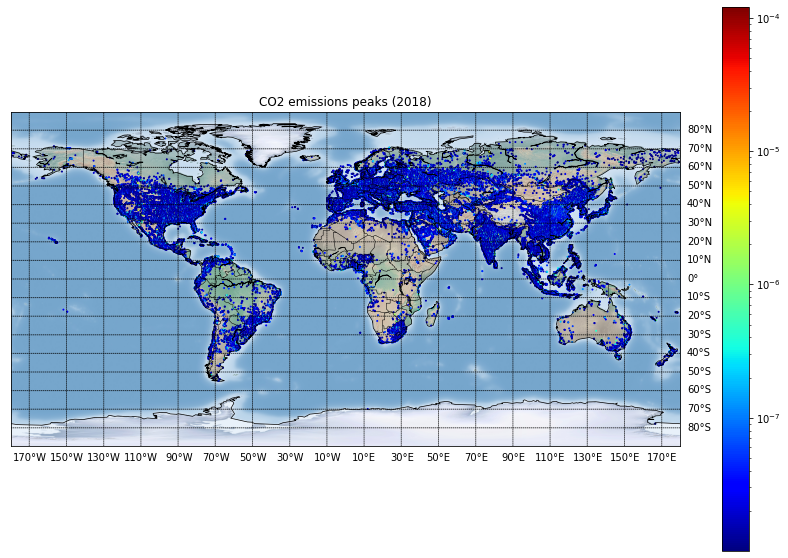

In [0]:
draw_map_Edgar(CO2_emissions_Edgar_peaks_2018,'CO2 emissions peaks (2018)', frontier=True)

### 1.3.5 Export data

In [0]:
CO2_emissions_Edgar_2015_v3.to_csv("/content/drive/My Drive/Data For Good/Outputs/CO2_emissions_Edgar_2015_v3.csv")
CO2_emissions_Edgar_2016_v3.to_csv("/content/drive/My Drive/Data For Good/Outputs/CO2_emissions_Edgar_2016_v3.csv")
CO2_emissions_Edgar_2017_v3.to_csv("/content/drive/My Drive/Data For Good/Outputs/CO2_emissions_Edgar_2017_v3.csv")
CO2_emissions_Edgar_2018_v3.to_csv("/content/drive/My Drive/Data For Good/Outputs/CO2_emissions_Edgar_2018_v3.csv")

# **2. Localized CO2 emissions peaks**

All the following data points that we will find below could be assimilated to the category 'High' of the Edgar data, meaning that we will only focus on coordinates where the CO2 emissions is high (and even very high)



## 2.1 Power plants

Data from power plants burning fossil fuels. 

Link: http://datasets.wri.org/dataset/globalpowerplantdatabase

The World Resource Institute provides a list of power plants producing electricity based on different primary energies. We filtered this list to keep only the fossil primary energies (gas, oil and coal), that release CO2 during their combustion. 

The dataset gives the latitude and longitude of these power plants, as well as the electricity produced, in GWh. 

We will cross this data with the emission factors (in gCO2/KWh) of the different types of power plants, in order to estimate their CO2 emissions. We consider the emissions factor from the ADEME (https://www.bilans-ges.ademe.fr/docutheque/docs/Documentation%20g%C3%A9n%C3%A9rale%20anglaise%20v17.0.pdf, page 111).

These emission factors include the upstream of fuels (extraction, processing, refining, transportation and distribution), and the combustion. Therefore, the value returned by crossing the electricity produced by the power plants with these emission factor will therefore be greater than the actual value because it includes an upstream part of emissions that did not take place directly at the site of the power plant generating electricity, and therefore CO2.

Therefore, our estimation of the power plants CO2 emissions will be be larger that the actual emissions (because it will attribute to the power plants the upstream part of emissions, that are in reality not emitted at the site of the power plant). However, given our goal is here to localize CO2 emission peaks, we leave this question aside. 

### 2.1.1 Import data

In [0]:
path_power_plant1 = "/content/drive/My Drive/Data For Good/Inputs/WRI data/global_power_plant_database.csv"
df_source1 = pd.read_csv(path_power_plant1, sep=",")
df_source1.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,32.3220,65.1190,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,1009793,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,34.5560,69.4787,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,1009795,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,34.6410,69.7170,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,1009797,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,34.4847,70.3633,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,1009787,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.00,34.5638,69.1134,Gas,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,NaN


### 2.1.2 Transform into dataframe

Work on the format of the dataframe

In [0]:
centrale_preparation = df_source1.copy()

# Suppression des colonnes inutiles

centrale_preparation = centrale_preparation.drop(['country','commissioning_year', 'owner', 'source','gppd_idnr', 'other_fuel1','other_fuel2','other_fuel3', 'url','geolocation_source', 'wepp_id','year_of_capacity_data'],axis=1)
# centrale_preparation.head()

In [0]:
# Renaming the source of the CO2 emissions for more clarity

centrale_preparation.replace('Gas', 'Gas power plant', inplace=True)
centrale_preparation.replace('Oil', 'Oil power plant', inplace=True)
centrale_preparation.replace('Coal', 'Coal power plant', inplace=True)

In [0]:
# Pour observer tous les types de centrale

centrale_preparation['primary_fuel'].unique()

array(['Hydro', 'Gas power plant', 'Other', 'Oil power plant', 'Wind',
       'Nuclear', 'Coal power plant', 'Solar', 'Waste', 'Biomass',
       'Wave and Tidal', 'Petcoke', 'Geothermal', 'Cogeneration',
       'Storage'], dtype=object)

In [0]:
# Suppression des centrales hors gaz, pétrole et charbon pour ne garder que les centrales très émissives en CO2

Drop_liste = ('Hydro', 'Other', 'Biomass', 'Petcoke','Wind', 'Nuclear', 'Solar', 'Waste', 'Wave and Tidal', 'Geothermal', 'Cogeneration', 'Storage')

for L in Drop_liste:
        IndexFuel = centrale_preparation[(centrale_preparation['primary_fuel'] == L)].index
        centrale_preparation.drop(IndexFuel, inplace = True)

# Vérification qu'il ne reste que les centrales à gaz, pétrole ou charbon 

centrale_preparation['primary_fuel'].unique()

array(['Gas power plant', 'Oil power plant', 'Coal power plant'],
      dtype=object)

In [0]:
# Visualisation des données manquantes

centrale_preparation.count()

country_long                8602
name                        8602
capacity_mw                 8602
latitude                    8602
longitude                   8602
primary_fuel                8602
generation_gwh_2013         3078
generation_gwh_2014         3117
generation_gwh_2015         3312
generation_gwh_2016         3274
generation_gwh_2017         3210
estimated_generation_gwh    5403
dtype: int64

Creation of the dataframe to add emissions factors (source: ADEME), and merge of both dataframes

In [0]:
gCO2_KWh = pd.DataFrame ({'primary_fuel': ['Gas power plant', 'Oil power plant', 'Coal power plant'], 'gCO2/KWh': [443, 778, 1050]})

In [0]:
# Fusion des dataframe

centrale_preparation = centrale_preparation.merge(gCO2_KWh, on='primary_fuel', how='left')
centrale_preparation.head()

,country_long,name,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh,gCO2/KWh
0,Afghanistan,Northwest Kabul Power Plant Afghanistan,42.0,34.5638,69.1134,Gas power plant,NaN,NaN,NaN,NaN,NaN,NaN,443
1,Algeria,Ain Djasser,520.0,35.8665,6.0262,Gas power plant,NaN,NaN,NaN,NaN,NaN,2152.249819,443
2,Algeria,Annaba,71.0,36.8924,7.7634,Gas power plant,NaN,NaN,NaN,NaN,NaN,293.864879,443
3,Algeria,Arbaa,560.0,36.5988,3.1375,Gas power plant,NaN,NaN,NaN,NaN,NaN,2317.807497,443
4,Algeria,Boufarik 1,100.0,36.5914,2.9223,Gas power plant,NaN,NaN,NaN,NaN,NaN,413.894196,443


In [0]:
centrale_preparation.describe()

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh,gCO2/KWh
count,8602.000000,8602.000000,8602.000000,3078.000000,3117.000000,3312.000000,3274.000000,3210.000000,5403.000000,8602.000000
mean,434.151369,27.287221,-5.885974,1045.620597,1091.104519,1120.312133,1058.376820,1134.772571,2265.492359,700.833062
std,690.388169,24.641181,86.714480,2578.122419,2715.041407,2675.889462,2632.241272,2674.701678,7140.625909,256.469725
min,1.000000,-77.847000,-179.977700,-2.653000,-262.902000,-141.014000,-127.507000,-132.033000,0.000000,443.000000
25%,16.073750,21.434975,-84.425525,0.035250,0.032000,0.025000,0.019000,0.341514,89.494709,443.000000
50%,132.250000,35.594300,-23.547500,18.245000,16.227000,22.749000,16.377500,36.623000,737.318085,778.000000
75%,600.000000,42.104150,79.832125,633.405479,630.858000,762.341497,583.308501,697.294500,2782.119122,1050.000000
max,8865.000000,71.292000,178.835900,27586.200000,28127.000000,32157.000000,30015.000000,35116.000000,450562.692350,1050.000000


On observe des données de 'generation GWh' négatives. Nous traiterons ce problème plus tard lors du calcul des tonnes de CO2 émises 

Traitement des données 

In [0]:
CO2_emissions_centrale = centrale_preparation.copy()

Que représentent les données "estimated_generation_gwh" ? Voici ce qu'indique la source (https://wriorg.s3.amazonaws.com/s3fs-public/global-power-plant-database-technical-note-v1.0.pdf): "When (annual) generation is reported, we include it directly in the database. When generation information is not available for a specific plant, we estimate it, although estimating annual generation at the plant level is challenging. Electricity generated by each plant varies by time period and depends on factors such as the regulatory environment, level of demand, cost of fuels, and extent of planned and unplanned maintenance in addition to plant-level characteristics. We devised two potential ways to estimate annual plant-level electricity generation: scaling information on aggregate generation by plant size and a machine-learning approach"

Pour chaque année, les données 'generation_gwh_year' indiquent la donnée réellement mesurée. 

Pour 2017, nous avons également la donnée estimée en l'absence de donnée mesurée. Nous avons donc deux types de données:
- Données 'generation_gwh_2017' classique
- Données 'generation_gwh_2017_with_estimated_data' sélectionnant en priorité les données reportées, i.e. non estimées, et sinon les données estimées 

In [0]:
# Création de la colonne 'generation_gwh_2017_with_estimated_data' sélectionnant les données non estimées en priorité, et les données estimées sinon

CO2_emissions_centrale['generation_gwh_2017_with_estimated_data'] = 0

for i in range (CO2_emissions_centrale.shape[0]):
    if math.isnan(CO2_emissions_centrale['generation_gwh_2017'].iloc[i]):                
      CO2_emissions_centrale['generation_gwh_2017_with_estimated_data'].iloc[i] = CO2_emissions_centrale['estimated_generation_gwh'].iloc[i]
    else:
      CO2_emissions_centrale['generation_gwh_2017_with_estimated_data'].iloc[i] = CO2_emissions_centrale['generation_gwh_2017'].iloc[i]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
# Comptage du nombre de données 'generation_gwh_2017_with_estimated_data' manquantes

count = 0

for i in range(CO2_emissions_centrale.shape[0]):
    if math.isnan(CO2_emissions_centrale['generation_gwh_2017_with_estimated_data'].iloc[i]):
      count = count +1

print("Il manque des données de production d'électricité en GWh pour", count, "centrales brûlant des combustibles fossiles sur les", CO2_emissions_centrale.shape[0], "du dataset")

Il manque des données de production d'électricité en GWh pour 162 centrales brûlant des combustibles fossiles sur les 8602 du dataset


Création des valeurs de CO2 émis pour chaque année. Si les GWh d'électricité produite sont négatifs, nous indiquerons que les tonnes de CO2 émises sont un 'NaN' pour ne pas avoir de tonnes négatives de CO2 émis, ce qui nuirait  la performance de notre algorithme de détection des pics.
A noter qu'il existe deux versions pour l'année 2017: une version avec uniquement les données mesurées, et une version avec les données mesurées en priorité, et les données estimées sinon

Création des colonnes calculant les tonnes de CO2 émises par an

In [0]:
CO2_emissions_centrale['tCO2_emitted_in_2013'] = 0
CO2_emissions_centrale['tCO2_emitted_in_2014'] = 0
CO2_emissions_centrale['tCO2_emitted_in_2015'] = 0
CO2_emissions_centrale['tCO2_emitted_in_2016'] = 0
CO2_emissions_centrale['tCO2_emitted_in_2017'] = 0
CO2_emissions_centrale['tCO2_emitted_in_2017_with estimated_data'] = 0

In [0]:
for i in range(CO2_emissions_centrale.shape[0]):
    
    # 2013
    if CO2_emissions_centrale['generation_gwh_2013'].iloc[i] <= 0:
      CO2_emissions_centrale['tCO2_emitted_in_2013'].iloc[i] = np.nan
    else:
        CO2_emissions_centrale['tCO2_emitted_in_2013'].iloc[i] = CO2_emissions_centrale['generation_gwh_2013'].iloc[i]*CO2_emissions_centrale['gCO2/KWh'].iloc[i]
    
    # 2014
    if CO2_emissions_centrale['generation_gwh_2014'].iloc[i] <= 0:
      CO2_emissions_centrale['tCO2_emitted_in_2014'].iloc[i] = np.nan
    else:
        CO2_emissions_centrale['tCO2_emitted_in_2014'].iloc[i] = CO2_emissions_centrale['generation_gwh_2014'].iloc[i]*CO2_emissions_centrale['gCO2/KWh'].iloc[i]
    
    # 2015
    if CO2_emissions_centrale['generation_gwh_2015'].iloc[i] <= 0:
      CO2_emissions_centrale['tCO2_emitted_in_2015'].iloc[i] = np.nan
    else:
        CO2_emissions_centrale['tCO2_emitted_in_2015'].iloc[i] = CO2_emissions_centrale['generation_gwh_2015'].iloc[i]*CO2_emissions_centrale['gCO2/KWh'].iloc[i]
    
    # 2016
    if CO2_emissions_centrale['generation_gwh_2016'].iloc[i] <= 0:
      CO2_emissions_centrale['tCO2_emitted_in_2016'].iloc[i] = np.nan
    else:
        CO2_emissions_centrale['tCO2_emitted_in_2016'].iloc[i] = CO2_emissions_centrale['generation_gwh_2016'].iloc[i]*CO2_emissions_centrale['gCO2/KWh'].iloc[i]
    
    # 2017 
    if CO2_emissions_centrale['generation_gwh_2017'].iloc[i] <= 0:
      CO2_emissions_centrale['tCO2_emitted_in_2017'].iloc[i] = np.nan
    else:
        CO2_emissions_centrale['tCO2_emitted_in_2017'].iloc[i] = CO2_emissions_centrale['generation_gwh_2017'].iloc[i]*CO2_emissions_centrale['gCO2/KWh'].iloc[i]
    
    # 2017 with estimated data
    if CO2_emissions_centrale['generation_gwh_2017_with_estimated_data'].iloc[i] <= 0:
      CO2_emissions_centrale['tCO2_emitted_in_2017_with estimated_data'].iloc[i] = np.nan
    else:
        CO2_emissions_centrale['tCO2_emitted_in_2017_with estimated_data'].iloc[i] = CO2_emissions_centrale['generation_gwh_2017_with_estimated_data'].iloc[i]*CO2_emissions_centrale['gCO2/KWh'].iloc[i]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Extrapolation to get data for 2018 and 2019.

The (rough) hypothesis done is that these years will have the same data as 2017 with estimated data. The ratonal behind it is that these power plants have a "long" lifetime (e.g. > 20 years for coal power plants and often > 40 years, source: https://www.gem.wiki/Estimating_carbon_dioxide_emissions_from_coal_plants), and 2018 & 2019 years could be important for the CO2 emissions peak algorithm

In [0]:
CO2_emissions_centrale['tCO2_emitted_in_2018_with estimated_data_extrapolated'] = CO2_emissions_centrale['tCO2_emitted_in_2017_with estimated_data']
CO2_emissions_centrale['tCO2_emitted_in_2019_with estimated_data_extrapolated'] = CO2_emissions_centrale['tCO2_emitted_in_2017_with estimated_data']

In [0]:
CO2_emissions_centrale.describe()

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh,gCO2/KWh,generation_gwh_2017_with_estimated_data,tCO2_emitted_in_2013,tCO2_emitted_in_2014,tCO2_emitted_in_2015,tCO2_emitted_in_2016,tCO2_emitted_in_2017,tCO2_emitted_in_2017_with estimated_data,tCO2_emitted_in_2018_with estimated_data_extrapolated,tCO2_emitted_in_2019_with estimated_data_extrapolated
count,8602.000000,8602.000000,8602.000000,3078.000000,3117.000000,3312.000000,3274.000000,3210.000000,5403.000000,8602.000000,8440.000000,2.501000e+03,2.506000e+03,2.626000e+03,2.578000e+03,2.911000e+03,8.117000e+03,8.117000e+03,8.117000e+03
mean,434.151369,27.287221,-5.885974,1045.620597,1091.104519,1120.312133,1058.376820,1134.772571,2265.492359,700.833062,1842.772024,1.069131e+06,1.122008e+06,1.151719e+06,1.107251e+06,1.024456e+06,1.600001e+06,1.600001e+06,1.600001e+06
std,690.388169,24.641181,86.714480,2578.122419,2715.041407,2675.889462,2632.241272,2674.701678,7140.625909,256.469725,5953.860708,2.766214e+06,2.885234e+06,2.880726e+06,2.838359e+06,2.700108e+06,6.157755e+06,6.157755e+06,6.157755e+06
min,1.000000,-77.847000,-179.977700,-2.653000,-262.902000,-141.014000,-127.507000,-132.033000,0.000000,443.000000,-132.033000,4.430000e-01,4.430000e-01,4.341400e-01,4.430000e-01,4.430000e-01,4.430000e-01,4.430000e-01,4.430000e-01
25%,16.073750,21.434975,-84.425525,0.035250,0.032000,0.025000,0.019000,0.341514,89.494709,443.000000,18.882956,9.147950e+02,1.233559e+03,1.715101e+03,1.480100e+03,1.343272e+03,1.490719e+04,1.490719e+04,1.490719e+04
50%,132.250000,35.594300,-23.547500,18.245000,16.227000,22.749000,16.377500,36.623000,737.318085,778.000000,340.484944,3.295034e+04,3.159139e+04,4.849787e+04,4.075982e+04,3.146325e+04,2.454231e+05,2.454231e+05,2.454231e+05
75%,600.000000,42.104150,79.832125,633.405479,630.858000,762.341497,583.308501,697.294500,2782.119122,1050.000000,2240.154958,6.549299e+05,7.049683e+05,8.550636e+05,7.071569e+05,5.306828e+05,1.527570e+06,1.527570e+06,1.527570e+06
max,8865.000000,71.292000,178.835900,27586.200000,28127.000000,32157.000000,30015.000000,35116.000000,450562.692350,1050.000000,450562.692350,2.896551e+07,2.953335e+07,3.376485e+07,3.151575e+07,3.687180e+07,4.730908e+08,4.730908e+08,4.730908e+08


Pour 'tCO2_emitted_in_2017_with estimated_data', on observe un maximum de l'ordre de 10^8 tonnes de CO2 émis par an. Or les centrales les plus polluantes au monde sont plus de l'ordre de 10^7 tonnes de CO2 émis par an (sources: https://www.eurekalert.org/pub_releases/2007-11/cfgd-crc111207.php; https://www.theguardian.com/environment/2012/jan/12/america-top-polluting-power-stations). Cet écart vient peut-être des hypothèses faites dans les estimations en production d'électricité de la source sélectionnée quand les données n'ont pas pu être mesurées

In [0]:
CO2_emissions_centrale.count()

country_long                                             8602
name                                                     8602
capacity_mw                                              8602
latitude                                                 8602
longitude                                                8602
primary_fuel                                             8602
generation_gwh_2013                                      3078
generation_gwh_2014                                      3117
generation_gwh_2015                                      3312
generation_gwh_2016                                      3274
generation_gwh_2017                                      3210
estimated_generation_gwh                                 5403
gCO2/KWh                                                 8602
generation_gwh_2017_with_estimated_data                  8440
tCO2_emitted_in_2013                                     2501
tCO2_emitted_in_2014                                     2506
tCO2_emi

### 2.1.2 Data visualisation

Uniquement les centrales

In [0]:
def draw_map_centrale(data, year, titre, lon_min=-180, lon_max=180, lat_min=-90, lat_max=90, size_point=1, frontier=False):

    plt.figure(figsize=(15, 10), edgecolor='w')
    m = Basemap(llcrnrlat=lat_min, urcrnrlat=lat_max, llcrnrlon=lon_min, urcrnrlon=lon_max)
    
    m.shadedrelief()
        
    parallels = np.arange(-80.,81,10.)
    m.drawparallels(parallels,labels=[False,True,True,False])

    meridians = np.arange(10.,351.,20.)
    m.drawmeridians(meridians,labels=[True,False,False,True])

    normal = matplotlib.colors.LogNorm(vmax=data[year].max())

    m.scatter(data['longitude'], data['latitude'], c=data[year], cmap=plt.cm.jet, s=size_point, norm=normal)
    plt.colorbar()
    plt.title(titre)

    if (frontier):
      m.drawcountries(linewidth=0.5)
      m.drawcoastlines(linewidth=0.7)

    plt.show()

In [0]:
#year_selected_plant = ('tCO2_emitted_in_2013','tCO2_emitted_in_2014','tCO2_emitted_in_2015','tCO2_emitted_in_2016','tCO2_emitted_in_2017','tCO2_emitted_in_2017_with estimated_data')
#title_list_plant = ('Tonnes of CO2 emitted per power plant in year 2013','Tonnes of CO2 emitted per power plant in year 2014','Tonnes of CO2 emitted per power plant in year 2015','Tonnes of CO2 emitted per power plant in year 2016','Tonnes of CO2 emitted per power plant in year 2017','Tonnes of CO2 emitted per power plant in year 2017 with estimated data added')

In [0]:
#for i in range(len(year_selected_plant)):
#  draw_map_centrale(CO2_emissions_centrale, year_selected_plant[i], title_list_plant[i], frontier=True)

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


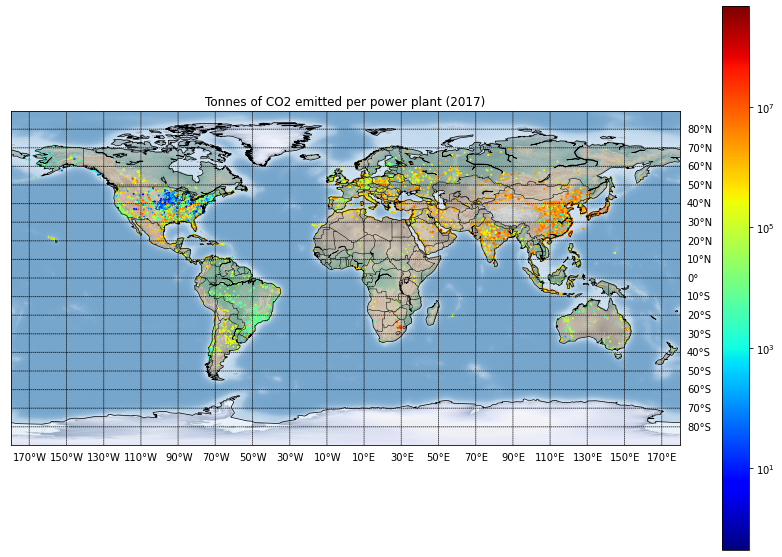

In [0]:
draw_map_centrale(CO2_emissions_centrale, 'tCO2_emitted_in_2017_with estimated_data', 'Tonnes of CO2 emitted per power plant (2017)', frontier=True)

### 2.1.3 Export data

In [0]:
CO2_emissions_centrale.to_csv("/content/drive/My Drive/Data For Good/Outputs/CO2_emissions_centrale.csv")

## 2.2 Data from Global coal plant tracker

This dataset has been provided by the Global Energy Monitor (GEM). 
It lists coal power plants and calculates the tonnes of CO2 emitted per year. The methodology can be found there https://www.gem.wiki/Estimating_carbon_dioxide_emissions_from_coal_plants.

To summarize, four factors are used to estimate the CO2 emissions from coal plants:
- Plant capacity
- Plant capacity factor
- Heat rate of plant (an expression of efficiency)
- Emissions factor of the type of coal used in the plant

We added some columns in the csv file provided - 'Status 2016 (done by Data4Good)' for example - indicating if the power plant was operating or not at the corresponding year (this data was only available as of January 2020). The methodology was the following:
- If the 'Status' column indicates 'Mothballed' then set to 'Not operating'
- If the column 'Year' is inferior ou equal to the corresponding year and this data is not empty, then set to 'Not operating'
- If the column 'RETIRED' is strictly superior to the corresponding year or the data is empty (when this data is empty, this is also the case for the column "RETIRED" meaning that the power plant will not operate, e.g. "Cancelled" status), then set to 'Not operating'
- Else set to 'Operating'  

### 2.2.1 Import data

In [0]:
CO2_emissions_coal_plant = pd.read_csv(r"/content/drive/My Drive/Data For Good/Inputs/Global coal plant tracker/January 2020 Global Coal Plant Tracker.csv", sep=";", encoding='latin1')
CO2_emissions_coal_plant.head()

,Tracker ID,TrackerLOC,Wiki page,Country,"Subnational unit (province, state)",Unit,Plant,Chinese Name,Other names,Sponsor,Parent,Capacity (MW),Status,Status 2016 (done by Data4Good),Status 2017 (done by Data4Good),Status 2018 (done by Data4Good),Status 2019 (done by Data4Good),Suspension policy,Pre-suspension status,Year,RETIRED,Combustion technology,Coal type,Planned Retire,Coal source,Location,"Local area (taluk, county)","Major area (prefecture, district)",Region,Latitude,Longitude,Accuracy,Annual CO2 (million tonnes / annum),Lifetime CO2 (million tonnes),Permits
0,G108106,L100001,http://bit.ly/Ur1VP1,Albania,NaN,Porto Romano Power Station Unit 1,Porto Romano Power Station,NaN,NaN,Enel,Enel,800,Cancelled,Not operating,Not operating,Not operating,Not operating,NaN,NaN,NaN,NaN,Ultra-super,Bituminous,NaN,NaN,Porto Romano,NaN,NaN,non-EU Europe,41.37114,19.4252,approximate,3.217105,128.684218,NaN
1,G108585,L100003,http://bit.ly/1g7lD7Q,Argentina,Santa Cruz,Río Turbio power station Unit 1,Río Turbio power station,NaN,NaN,Isolux Corsán,Yacimientos Carboníferos de Río Turbio,120,Mothballed,Not operating,Not operating,Not operating,Not operating,NaN,NaN,2015,NaN,Subcritical,Bituminous,NaN,NaN,Río Turbio coal mine,NaN,Güer Aike,Latin America,-51.54600,-72.2313,Exact,0.609181,24.367240,NaN
2,G108586,L100003,http://bit.ly/1g7lD7Q,Argentina,Santa Cruz,Río Turbio power station Unit 2,Río Turbio power station,NaN,NaN,Isolux Corsán,Yacimientos Carboníferos de Río Turbio,120,Shelved,Not operating,Not operating,Not operating,Not operating,NaN,NaN,NaN,NaN,Subcritical,Bituminous,NaN,NaN,Río Turbio coal mine,NaN,Güer Aike,Latin America,-51.54600,-72.2313,Exact,0.609181,24.367240,NaN
3,G108783,L100002,http://bit.ly/1UqLug2,Argentina,Buenos Aires,San Nicolás-2 power station Unit 11,San Nicolás power station,NaN,NaN,AES Argentina,AES,350,Operating,Operating,Operating,Operating,Operating,NaN,NaN,1983,NaN,Subcritical,Bituminous,NaN,NaN,San Nicolás de los Arroyos,NaN,San Nicolás,Latin America,-33.35490,-60.1729,exact,1.998875,5.996626,NaN
4,G100202,L100031,http://bit.ly/1T2gvtt,Australia,Victoria,Anglesea power station Unit 1,Anglesea power station,NaN,NaN,Alcoa of Australia,Alcoa,160,Retired,Not operating,Not operating,Not operating,Not operating,NaN,NaN,1969,2015.0,Subcritical,Lignite,NaN,NaN,Anglesea,NaN,NaN,Australia/NZ,-38.38650,144.1821,exact,1.047857,0.000000,NaN


### 2.2.2 Transfom into dataframe

Removal of useless columns

In [0]:
CO2_emissions_coal_plant = CO2_emissions_coal_plant.drop(['Tracker ID','TrackerLOC', 'Wiki page', 'Subnational unit (province, state)','Unit', 'Chinese Name','Other names',
                                                          'Sponsor', 'Parent','Suspension policy', 'Pre-suspension status','Year','RETIRED', 'Planned Retire', 'Coal source', 
                                                          'Location', 'Local area (taluk, county)', 'Major area (prefecture, district)', 'Region', 'Accuracy', 
                                                          'Lifetime CO2 (million tonnes)', 'Permits'],axis=1)
CO2_emissions_coal_plant.head()

,Country,Plant,Capacity (MW),Status,Status 2016 (done by Data4Good),Status 2017 (done by Data4Good),Status 2018 (done by Data4Good),Status 2019 (done by Data4Good),Combustion technology,Coal type,Latitude,Longitude,Annual CO2 (million tonnes / annum)
0,Albania,Porto Romano Power Station,800,Cancelled,Not operating,Not operating,Not operating,Not operating,Ultra-super,Bituminous,41.37114,19.4252,3.217105
1,Argentina,Río Turbio power station,120,Mothballed,Not operating,Not operating,Not operating,Not operating,Subcritical,Bituminous,-51.54600,-72.2313,0.609181
2,Argentina,Río Turbio power station,120,Shelved,Not operating,Not operating,Not operating,Not operating,Subcritical,Bituminous,-51.54600,-72.2313,0.609181
3,Argentina,San Nicolás power station,350,Operating,Operating,Operating,Operating,Operating,Subcritical,Bituminous,-33.35490,-60.1729,1.998875
4,Australia,Anglesea power station,160,Retired,Not operating,Not operating,Not operating,Not operating,Subcritical,Lignite,-38.38650,144.1821,1.047857


Creation of new columns calculating the CO2 emitted for a specific year

In [0]:
# 2016

CO2_emissions_coal_plant['Annual CO2 emissions (millions of tonnes) in 2016'] = CO2_emissions_coal_plant['Annual CO2 (million tonnes / annum)']
CO2_emissions_coal_plant.loc[CO2_emissions_coal_plant['Status 2016 (done by Data4Good)'] == 'Not operating', 'Annual CO2 emissions (millions of tonnes) in 2016'] = np.nan

# 2017

CO2_emissions_coal_plant['Annual CO2 emissions (millions of tonnes) in 2017'] = CO2_emissions_coal_plant['Annual CO2 (million tonnes / annum)']
CO2_emissions_coal_plant.loc[CO2_emissions_coal_plant['Status 2017 (done by Data4Good)'] == 'Not operating', 'Annual CO2 emissions (millions of tonnes) in 2017'] = np.nan

# 2018

CO2_emissions_coal_plant['Annual CO2 emissions (millions of tonnes) in 2018'] = CO2_emissions_coal_plant['Annual CO2 (million tonnes / annum)']
CO2_emissions_coal_plant.loc[CO2_emissions_coal_plant['Status 2018 (done by Data4Good)'] == 'Not operating', 'Annual CO2 emissions (millions of tonnes) in 2018'] = np.nan

# 2019

CO2_emissions_coal_plant['Annual CO2 emissions (millions of tonnes) in 2019'] = CO2_emissions_coal_plant['Annual CO2 (million tonnes / annum)']
CO2_emissions_coal_plant.loc[CO2_emissions_coal_plant['Status 2019 (done by Data4Good)'] == 'Not operating', 'Annual CO2 emissions (millions of tonnes) in 2019'] = np.nan

In [0]:
CO2_emissions_coal_plant.head()

,Country,Plant,Capacity (MW),Status,Status 2016 (done by Data4Good),Status 2017 (done by Data4Good),Status 2018 (done by Data4Good),Status 2019 (done by Data4Good),Combustion technology,Coal type,Latitude,Longitude,Annual CO2 (million tonnes / annum),Annual CO2 emissions (millions of tonnes) in 2016,Annual CO2 emissions (millions of tonnes) in 2017,Annual CO2 emissions (millions of tonnes) in 2018,Annual CO2 emissions (millions of tonnes) in 2019
0,Albania,Porto Romano Power Station,800,Cancelled,Not operating,Not operating,Not operating,Not operating,Ultra-super,Bituminous,41.37114,19.4252,3.217105,NaN,NaN,NaN,NaN
1,Argentina,Río Turbio power station,120,Mothballed,Not operating,Not operating,Not operating,Not operating,Subcritical,Bituminous,-51.54600,-72.2313,0.609181,NaN,NaN,NaN,NaN
2,Argentina,Río Turbio power station,120,Shelved,Not operating,Not operating,Not operating,Not operating,Subcritical,Bituminous,-51.54600,-72.2313,0.609181,NaN,NaN,NaN,NaN
3,Argentina,San Nicolás power station,350,Operating,Operating,Operating,Operating,Operating,Subcritical,Bituminous,-33.35490,-60.1729,1.998875,1.998875,1.998875,1.998875,1.998875
4,Australia,Anglesea power station,160,Retired,Not operating,Not operating,Not operating,Not operating,Subcritical,Lignite,-38.38650,144.1821,1.047857,NaN,NaN,NaN,NaN


### 2.2.3 Data visualisation

Visualisation of the CO2 emissions data - example of 2016

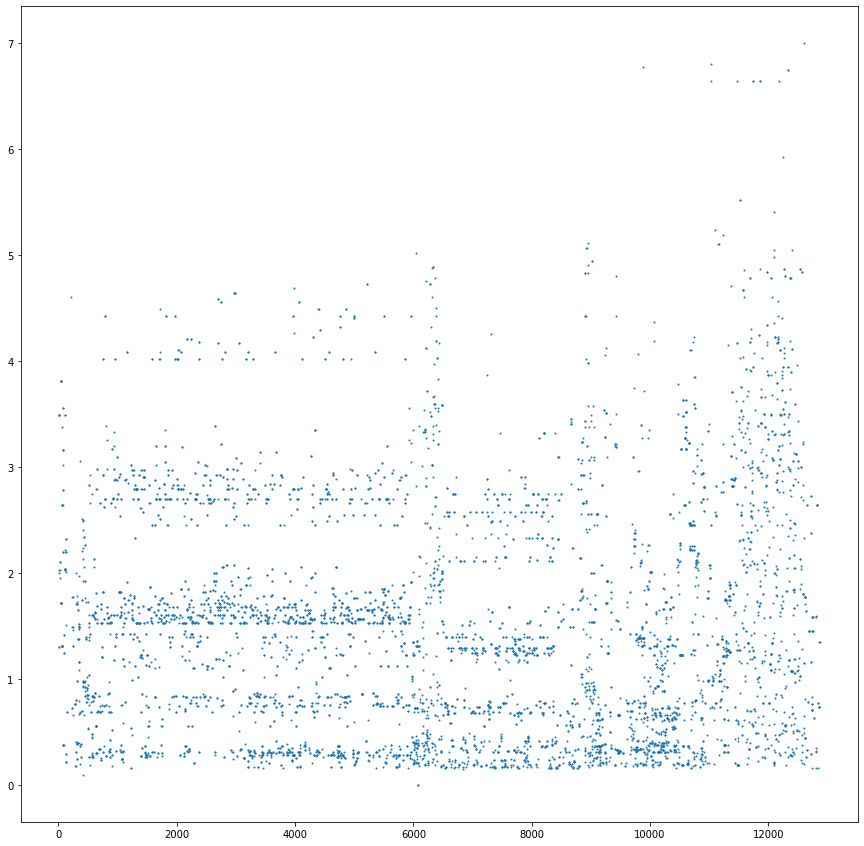

In [0]:
plt.figure(figsize = (15,15))
plt.scatter(np.arange(0,CO2_emissions_coal_plant.shape[0],1),CO2_emissions_coal_plant['Annual CO2 emissions (millions of tonnes) in 2016'], s=1)

### 2.2.4 Export data

In [0]:
CO2_emissions_coal_plant.to_csv("/content/drive/My Drive/Data For Good/Outputs/CO2_emissions_coal_plant.csv")

## 2.3 Cities

The source of the data is: https://public.opendatasoft.com/explore/dataset/co2-emissions-cities/export/?sort=study_year_wb

It is comprised of the major cities in the world

In this dataset, we have the annual tCO2-eq emissions data for Scope 1 and Scope 2.
We will only use Scope 1 data, as it concerns direct emissions occuring from the cities (direct emissions from fossil fuel burning especially), whereas Scope 2 emissions are indirect emissions coming from the use of electricity, heat, steam or cold (therefore the CO2 emissions are not present where the energy is consumed, but the energy has been produced, which is not the city).

Moreover, some data available are in CO2-eq, which is not only comprised of CO2, but also CH4 and NO2 for instance. Therefore, the actual CO2 emissions would be lower than the data of this dataset for some data. We will find below that 'They are 44 cities with tCO2 data - and not tCO2-eq data - out of 187 cities in total'

At last, we do not have a comprehensive split by years. Therefore, we will assume that they are not major changes from 2016 to 2019, which seems to make sense as major cities does not 'evolve' a lot within a few years

### 2.3.1 Import data

In [0]:
path_cities_v1 = "/content/drive/My Drive/Data For Good/Inputs/Cities/co2-emissions-cities.csv"
cities_v1_preparation = pd.read_csv(path_cities_v1, sep=";")
cities_v1_preparation.head()

,City name,City name (CDP),City name (carbonn),City name (PKU),City name (GEA),City name (UITP),City name (WB),Definition (CDP),Definition (carbonn),Definition (WB),Study year (WB),Reporting year (CDP),Scope-1 GHG emissions [tCO2 or tCO2-eq],Scope-1 source dataset,Scope-1 GHG emissions units,Year of emission,Emissions protocol,Gases included (CDP),Methodology details (CDP),Increase/Decrease from last year (CDP),Reason for increase/decrease in emissions (CDP),Scope-2 (CDP) [tCO2-eq],Total emissions (CDP) [tCO2-eq],CDP2016 data edited (CDP),Emissions Quality Flag (CDP),S1 lower bound [tCO2] (CDP),S1 upper bound [tCO2] (CDP),S1 mean (CDP) [tCO2],TOT lower bound [tCO2] (CDP),TOT upper bound [tCO2] (CDP),TOT mean (CDP) [tCO2],Scope fraction (CDP),CO2 emissions per capita (PKU) [tCO2/capita],City location (CDP) [degrees],Coordinate source (others),Country,Region,Population (CDP),Population year (CDP),Population (carbonn),...,CIMI performance (IESE) [dimensionless],Urban area name (UEX),Low BUA - 1990 (UEX) [km2],Low BUA - 2000 (UEX) [km2],Low BUA - 2014 (UEX) [km2],High BUA - 1990 (UEX) [km2],High BUA - 2000 (UEX) [km2],High BUA - 2014 (UEX) [km2],Low BUA % - 1990 (UEX) [percent],Low BUA % - 2000 (UEX) [percent],Low BUA % - 2014 (UEX) [percent],High BUA % - 1990 (UEX) [percent],High BUA % - 2000 (UEX) [percent],High BUA % - 2014 (UEX) [percent],Low BUA population density - 1990 (UEX) [people/km2],High BUA population density - 1990 (UEX) [people/km2],Low BUA population density - 2000 (UEX) [people/km2],High BUA population density - 2000 (UEX) [people/km2],Low BUA population density - 2014 (UEX) [people/km2],High BUA population density - 2014 (UEX) [people/km2],Exports (others) [m3],Production (others) [m3],Natgas Export/Production ratio (others),CH4_waste/capita (others) [tCH4/capita],CH4_waste+natgas/capita (others) [tCH4/capita],Corrected CH4_(waste+natgas)/capita (others) [tCH4/capita],Year from CIA (others),AQF (CDP/GEA),AQF (CDP/WB),AQF (CDP/OTHERS),AQF (PKU/GEA),AQF (PKU/WB),AQF (PKU/OTHERS),PQF (CDP),PQF (carbonn),PQF (WB),PQF (WB2010),PQF (OTHERS),HQF (GEA+),HQF (OTHERS)
0,Toronto,City of Toronto,NaN,NaN,Toronto,Toronto,Toronto,Administrative boundary of a local government,NaN,Greater Toronto Area,2005.0,2016.0,1.615102e+07,CDP,tCO2,2013,Global Protocol for Community-Scale Greenhouse...,CO2,"Currently, Toronto’s emissions calculations fo...",Decreased,a. Eliminating the use of coal in the electri...,2169947.0,18320966.0,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,"43.653226,-79.3831843",https://en.wikipedia.org/wiki/Toronto,Canada,North America,2753100.0,2011.0,NaN,...,RA,Toronto Urban Area,571.4375,575.4375,579.9375,1514.5625,1690.1875,1882.3750,0.273939,0.253986,0.235526,0.726061,0.746014,0.764474,431.432118,2031.859282,458.892395,2785.230164,217.583540,3310.007300,7.796000e+10,1.515000e+11,0.51,0.046860,0.101728,0.073494,NaN,0.0,0.0,1.0,NaN,NaN,NaN,1.0,NaN,0.0,1.0,1.0,1.0,1.0
1,Santiago de Cali,Santiago de Cali,NaN,NaN,NaN,NaN,NaN,Combination of administrative divisions,NaN,NaN,NaN,2016.0,NaN,CDP,tCO2-eq,2010,2006 IPCC Guidelines for National Greenhouse G...,CO2;CH4;N2O,NaN,NaN,NaN,NaN,4174608.0,NaN,D,NaN,NaN,NaN,3.158859e+06,3.725714e+06,3.442286e+06,NaN,NaN,"3.451647,-76.531985",https://en.wikipedia.org/wiki/Cali,Colombia,Latin America & Caribbean,2369829.0,2015.0,NaN,...,NaN,Santiago de Cali Urban Area,56.0000,57.8125,62.6250,119.6875,122.3125,126.5000,0.318748,0.320958,0.331130,0.681252,0.679042,0.668870,845.544916,12504.360651,1581.022747,17057.840645,1663.541202,18606.553425,0.000000e+00,1.000000e+00,0.00,0.006765,0.015308,0.015308,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN
2,Kunming,NaN,NaN,Kuiming,Kunming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.649622e+06,PKU,tCO2,2010,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.610822,NaN,wikipedia,China,East Asia,NaN,NaN,NaN,...,NaN,Kunming Urban Area,181.0000,204.6875,233.7500,277.7500,296.1250,337.0625,0.394550,0.408711,0.409504,0.605450,0.591289,0.590496,1

### 2.3.2 Transform into dataframe

Selection of useful columns

In [0]:
cities_v1 = cities_v1_preparation[['City name', 'Country', 'Scope-1 GHG emissions [tCO2 or tCO2-eq]', 'Scope-1 source dataset', 'Scope-1 GHG emissions units', 'Year of emission', 
                                   'City location (CDP) [degrees]', 'Population (CDP)', 'Population year (CDP)']]
cities_v1.head()

,City name,Country,Scope-1 GHG emissions [tCO2 or tCO2-eq],Scope-1 source dataset,Scope-1 GHG emissions units,Year of emission,City location (CDP) [degrees],Population (CDP),Population year (CDP)
0,Toronto,Canada,1.615102e+07,CDP,tCO2,2013,"43.653226,-79.3831843",2753100.0,2011.0
1,Santiago de Cali,Colombia,NaN,CDP,tCO2-eq,2010,"3.451647,-76.531985",2369829.0,2015.0
2,Kunming,China,2.649622e+06,PKU,tCO2,2010,NaN,NaN,NaN
3,Baotou,China,3.363195e+06,PKU,tCO2,2010,NaN,NaN,NaN
4,Milano,Italy,3.728678e+06,CDP,tCO2,2013,"45.802578,9.086356",1350680.0,2014.0


Split of the column 'City location (CDP) [degrees]' to get latitudes and longitudes

In [0]:
# Create two lists for the loop results to be placed
lat = []
lon = []

# For each row in a varible,
for row in cities_v1['City location (CDP) [degrees]']:
    # Try to,
    try:
        # Split the row by comma and append
        # everything before the comma to lat
        lat.append(row.split(',')[0])
        # Split the row by comma and append
        # everything after the comma to lon
        lon.append(row.split(',')[1])
    # But if you get an error
    except:
        # append a missing value to lat
        lat.append(np.NaN)
        # append a missing value to lon
        lon.append(np.NaN)

# Create two new columns from lat and lon
cities_v1['latitude'] = lat
cities_v1['longitude'] = lon

# Convert into numeric values
cities_v1[['latitude', 'longitude']] = cities_v1[['latitude', 'longitude']].apply(pd.to_numeric)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [0]:
cities_v1.head()

,City name,Country,Scope-1 GHG emissions [tCO2 or tCO2-eq],Scope-1 source dataset,Scope-1 GHG emissions units,Year of emission,City location (CDP) [degrees],Population (CDP),Population year (CDP),latitude,longitude
0,Toronto,Canada,1.615102e+07,CDP,tCO2,2013,"43.653226,-79.3831843",2753100.0,2011.0,43.653226,-79.383184
1,Santiago de Cali,Colombia,NaN,CDP,tCO2-eq,2010,"3.451647,-76.531985",2369829.0,2015.0,3.451647,-76.531985
2,Kunming,China,2.649622e+06,PKU,tCO2,2010,NaN,NaN,NaN,NaN,NaN
3,Baotou,China,3.363195e+06,PKU,tCO2,2010,NaN,NaN,NaN,NaN,NaN
4,Milano,Italy,3.728678e+06,CDP,tCO2,2013,"45.802578,9.086356",1350680.0,2014.0,45.802578,9.086356


In [0]:
print("They are", cities_v1.shape[0], "cities in the dataset")

They are 343 cities in the dataset


Removal of the cities which latitude and longitude are NaN

In [0]:
cities_v1.dropna(subset = ['latitude', 'longitude'], inplace=True)
print("They are", cities_v1.shape[0], "cities after having removed cities without coordinate")

They are 187 cities after having removed cities without coordinate


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
count = cities_v1.loc[cities_v1['Scope-1 GHG emissions units'] == 'tCO2', 'Scope-1 GHG emissions units'].count()
print("They are", count, "cities with tCO2 data - and not tCO2-eq data - out of", cities_v1.shape[0], "cities with coordinates")

They are 44 cities with tCO2 data - and not tCO2-eq data - out of 187 cities with coordinates


### 2.3.3 Data visualisation

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


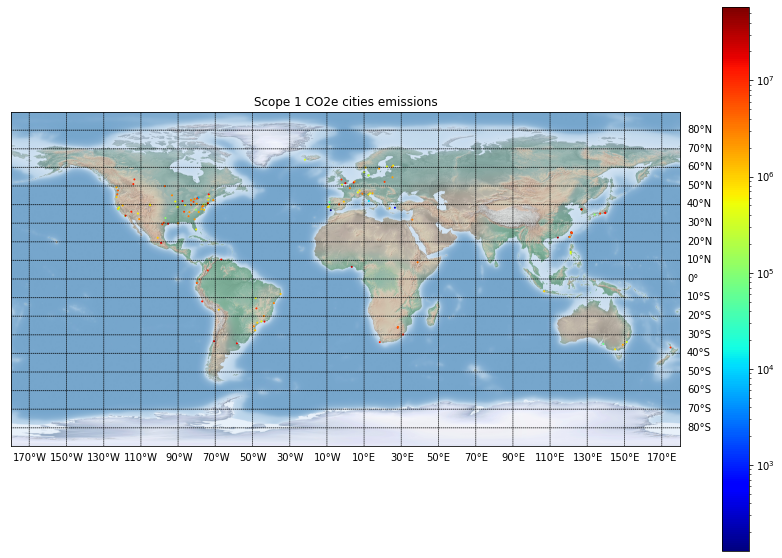

In [0]:
draw_map_centrale(cities_v1, 'Scope-1 GHG emissions [tCO2 or tCO2-eq]', 'Scope 1 CO2e cities emissions')

### 2.3.4 Export data

In [0]:
cities_v1.to_csv("/content/drive/My Drive/Data For Good/Outputs/cities_v1.csv")

## 2.X Merge of the CO2 emissions peaks data

'.X' as more datasets will be added depending on our research

### 2.X.1 Creation of the dataframes to merge the data

Data from power plants (2.1)

2016

In [0]:
centrale_all_for_merge_2016 = pd.DataFrame()

centrale_all_for_merge_2016['latitude'] = CO2_emissions_centrale['latitude']
centrale_all_for_merge_2016['longitude'] = CO2_emissions_centrale['longitude']
centrale_all_for_merge_2016['Data source'] = 'Global power plant database and ADEME for the emissions factors'
centrale_all_for_merge_2016['CO2 emissions source'] = CO2_emissions_centrale['primary_fuel']
centrale_all_for_merge_2016['CO2 emissions (in tonnes per year)'] = CO2_emissions_centrale['tCO2_emitted_in_2016']

# Delete plants which CO2 emissions is a NaN
centrale_all_for_merge_2016.dropna(subset = ['CO2 emissions (in tonnes per year)'], inplace=True)

2017 (the CO2 emissions data selected here is 'with estimated data')

In [0]:
centrale_all_for_merge_2017 = pd.DataFrame()

centrale_all_for_merge_2017['latitude'] = CO2_emissions_centrale['latitude']
centrale_all_for_merge_2017['longitude'] = CO2_emissions_centrale['longitude']
centrale_all_for_merge_2017['Data source'] = 'Global power plant database and ADEME for the emissions factors'
centrale_all_for_merge_2017['CO2 emissions source'] = CO2_emissions_centrale['primary_fuel']
centrale_all_for_merge_2017['CO2 emissions (in tonnes per year)'] = CO2_emissions_centrale['tCO2_emitted_in_2017_with estimated_data']

# Delete plants which CO2 emissions is a NaN
centrale_all_for_merge_2017.dropna(subset = ['CO2 emissions (in tonnes per year)'], inplace=True)

2018

In [0]:
centrale_all_for_merge_2018 = pd.DataFrame()

centrale_all_for_merge_2018['latitude'] = CO2_emissions_centrale['latitude']
centrale_all_for_merge_2018['longitude'] = CO2_emissions_centrale['longitude']
centrale_all_for_merge_2018['Data source'] = 'Global power plant database and ADEME for the emissions factors'
centrale_all_for_merge_2018['CO2 emissions source'] = CO2_emissions_centrale['primary_fuel']
centrale_all_for_merge_2018['CO2 emissions (in tonnes per year)'] = CO2_emissions_centrale['tCO2_emitted_in_2018_with estimated_data_extrapolated']

# Delete plants which CO2 emissions is a NaN
centrale_all_for_merge_2018.dropna(subset = ['CO2 emissions (in tonnes per year)'], inplace=True)

2019

In [0]:
centrale_all_for_merge_2019 = pd.DataFrame()

centrale_all_for_merge_2019['latitude'] = CO2_emissions_centrale['latitude']
centrale_all_for_merge_2019['longitude'] = CO2_emissions_centrale['longitude']
centrale_all_for_merge_2019['Data source'] = 'Global power plant database and ADEME for the emissions factors'
centrale_all_for_merge_2019['CO2 emissions source'] = CO2_emissions_centrale['primary_fuel']
centrale_all_for_merge_2019['CO2 emissions (in tonnes per year)'] = CO2_emissions_centrale['tCO2_emitted_in_2019_with estimated_data_extrapolated']

# Delete plants which CO2 emissions is a NaN
centrale_all_for_merge_2019.dropna(subset = ['CO2 emissions (in tonnes per year)'], inplace=True)

In [0]:
centrale_all_for_merge_2019

,latitude,longitude,Data source,CO2 emissions source,CO2 emissions (in tonnes per year)
1,35.8665,6.0262,Global power plant database and ADEME for the ...,Gas power plant,9.534467e+05
2,36.8924,7.7634,Global power plant database and ADEME for the ...,Gas power plant,1.301821e+05
3,36.5988,3.1375,Global power plant database and ADEME for the ...,Gas power plant,1.026789e+06
4,36.5914,2.9223,Global power plant database and ADEME for the ...,Gas power plant,1.833551e+05
5,36.5960,2.8780,Global power plant database and ADEME for the ...,Gas power plant,8.250981e+05
...,...,...,...,...,...
8596,-15.4330,28.3330,Global power plant database and ADEME for the ...,Oil power plant,2.821167e+04
8598,-12.5500,28.2333,Global power plant database and ADEME for the ...,Oil power plant,1.880778e+04
8599,-12.9667,28.6333,Global power plant database and ADEME for the ...,Oil power plant,9.403892e+04
8600,-12.8167,28.2000,Global power plant database and ADEME for the ...,Oil power plant,3.761557e+04


Data from coal power plants (2.2)

2016

In [0]:
coal_plant_for_merge_2016 = pd.DataFrame()

coal_plant_for_merge_2016['latitude'] = CO2_emissions_coal_plant['Latitude']
coal_plant_for_merge_2016['longitude'] = CO2_emissions_coal_plant['Longitude']
coal_plant_for_merge_2016['Data source'] = 'Global Energy Monitor'
coal_plant_for_merge_2016['CO2 emissions source'] = 'Coal power plant'
coal_plant_for_merge_2016['CO2 emissions (in tonnes per year)'] = CO2_emissions_coal_plant['Annual CO2 emissions (millions of tonnes) in 2016']*1000000

# Delete plants which CO2 emissions is a NaN
coal_plant_for_merge_2016.dropna(subset = ['CO2 emissions (in tonnes per year)'], inplace=True)

2017

In [0]:
coal_plant_for_merge_2017 = pd.DataFrame()

coal_plant_for_merge_2017['latitude'] = CO2_emissions_coal_plant['Latitude']
coal_plant_for_merge_2017['longitude'] = CO2_emissions_coal_plant['Longitude']
coal_plant_for_merge_2017['Data source'] = 'Global Energy Monitor'
coal_plant_for_merge_2017['CO2 emissions source'] = 'Coal power plant'
coal_plant_for_merge_2017['CO2 emissions (in tonnes per year)'] = CO2_emissions_coal_plant['Annual CO2 emissions (millions of tonnes) in 2017']*1000000

# Delete plants which CO2 emissions is a NaN
coal_plant_for_merge_2017.dropna(subset = ['CO2 emissions (in tonnes per year)'], inplace=True)

2018

In [0]:
coal_plant_for_merge_2018 = pd.DataFrame()

coal_plant_for_merge_2018['latitude'] = CO2_emissions_coal_plant['Latitude']
coal_plant_for_merge_2018['longitude'] = CO2_emissions_coal_plant['Longitude']
coal_plant_for_merge_2018['Data source'] = 'Global Energy Monitor'
coal_plant_for_merge_2018['CO2 emissions source'] = 'Coal power plant'
coal_plant_for_merge_2018['CO2 emissions (in tonnes per year)'] = CO2_emissions_coal_plant['Annual CO2 emissions (millions of tonnes) in 2018']*1000000

# Delete plants which CO2 emissions is a NaN
coal_plant_for_merge_2018.dropna(subset = ['CO2 emissions (in tonnes per year)'], inplace=True)

2019

In [0]:
coal_plant_for_merge_2019 = pd.DataFrame()

coal_plant_for_merge_2019['latitude'] = CO2_emissions_coal_plant['Latitude']
coal_plant_for_merge_2019['longitude'] = CO2_emissions_coal_plant['Longitude']
coal_plant_for_merge_2019['Data source'] = 'Global Energy Monitor'
coal_plant_for_merge_2019['CO2 emissions source'] = 'Coal power plant'
coal_plant_for_merge_2019['CO2 emissions (in tonnes per year)'] = CO2_emissions_coal_plant['Annual CO2 emissions (millions of tonnes) in 2019']*1000000

# Delete plants which CO2 emissions is a NaN
coal_plant_for_merge_2019.dropna(subset = ['CO2 emissions (in tonnes per year)'], inplace=True)

In [0]:
coal_plant_for_merge_2019

,latitude,longitude,Data source,CO2 emissions source,CO2 emissions (in tonnes per year)
3,-33.3549,-60.17290,Global Energy Monitor,Coal power plant,1.998875e+06
8,-32.3940,150.95010,Global Energy Monitor,Coal power plant,3.490100e+06
9,-32.3940,150.95010,Global Energy Monitor,Coal power plant,3.490100e+06
10,-32.3940,150.95010,Global Energy Monitor,Coal power plant,3.490100e+06
11,-32.3940,150.95010,Global Energy Monitor,Coal power plant,3.490100e+06
...,...,...,...,...,...
12862,-18.3832,26.46964,Global Energy Monitor,Coal power plant,7.360937e+05
12863,-18.3832,26.46964,Global Energy Monitor,Coal power plant,7.360937e+05
12864,-18.3832,26.46964,Global Energy Monitor,Coal power plant,7.360937e+05
12865,-18.3832,26.46964,Global Energy Monitor,Coal power plant,1.349505e+06


Data from cities (2.3)

In [0]:
cities_v1_for_merge = pd.DataFrame()

cities_v1_for_merge['latitude'] = cities_v1['latitude']
cities_v1_for_merge['longitude'] = cities_v1['longitude']
cities_v1_for_merge['Data source'] = 'Opendatasoft'
cities_v1_for_merge['CO2 emissions source'] = 'Cities (Scope 1) in tCO2e'
cities_v1_for_merge['CO2 emissions (in tonnes per year)'] = cities_v1['Scope-1 GHG emissions [tCO2 or tCO2-eq]']

In [0]:
cities_v1_for_merge.head()

,latitude,longitude,Data source,CO2 emissions source,CO2 emissions (in tonnes per year)
0,43.653226,-79.383184,Opendatasoft,Cities (Scope 1) in tCO2e,16151019.0
1,3.451647,-76.531985,Opendatasoft,Cities (Scope 1) in tCO2e,NaN
4,45.802578,9.086356,Opendatasoft,Cities (Scope 1) in tCO2e,3728678.0
5,37.668900,-122.080800,Opendatasoft,Cities (Scope 1) in tCO2e,861854.0
6,35.689634,139.692101,Opendatasoft,Cities (Scope 1) in tCO2e,27611000.0


### 2.X.2 Merge of the data

Removal of the duplicates - it concerns the coal power plants that are present in both dataset. Moreover, the dataset from 'Global Energy Monitor' already has a great number of duplicates, hence the relatively high number of duplicates that will be counted - and deleted - below. 

The source from 'Global power plant database' has been selected in priority when there are some duplicates.

Concerning the column 'CO2 emissions (in tonnes per year)', we are mixing data from different sources that use different methodologies to calculate this figure. Therefore, this data has been kept here for a better understanding of the CO2 emissions peak, but should not be used otherwise (e.g. should not be plotted).

2016

In [0]:
CO2_emissions_peaks_merged_2016 = pd.concat([centrale_all_for_merge_2016, coal_plant_for_merge_2016, cities_v1_for_merge])
CO2_emissions_peaks_merged_2016.drop_duplicates(['latitude','longitude'], keep = 'first', inplace=True)

nb_power_plant_duplicates = (centrale_all_for_merge_2016.shape[0] + coal_plant_for_merge_2016.shape[0] + cities_v1_for_merge.shape[0]) - CO2_emissions_peaks_merged_2016.shape[0]
print("There are", nb_power_plant_duplicates, "duplicates in 2016")

There are 4315 duplicates in 2016


2017

In [0]:
CO2_emissions_peaks_merged_2017 = pd.concat([centrale_all_for_merge_2017, coal_plant_for_merge_2017, cities_v1_for_merge])
CO2_emissions_peaks_merged_2017.drop_duplicates(['latitude','longitude'], keep = 'first', inplace=True)

nb_power_plant_duplicates = (centrale_all_for_merge_2017.shape[0] + coal_plant_for_merge_2017.shape[0] + cities_v1_for_merge.shape[0]) - CO2_emissions_peaks_merged_2017.shape[0]
print("There are", nb_power_plant_duplicates, "duplicates in 2017")

There are 4652 duplicates in 2017


2018

In [0]:
CO2_emissions_peaks_merged_2018 = pd.concat([centrale_all_for_merge_2018, coal_plant_for_merge_2018, cities_v1_for_merge])
CO2_emissions_peaks_merged_2018.drop_duplicates(['latitude','longitude'], keep = 'first', inplace=True)

nb_power_plant_duplicates = (centrale_all_for_merge_2018.shape[0] + coal_plant_for_merge_2018.shape[0] + cities_v1_for_merge.shape[0]) - CO2_emissions_peaks_merged_2018.shape[0]
print("There are", nb_power_plant_duplicates, "duplicates in 2018")

There are 4622 duplicates in 2018


2019

In [0]:
CO2_emissions_peaks_merged_2019 = pd.concat([centrale_all_for_merge_2019, coal_plant_for_merge_2019, cities_v1_for_merge])
CO2_emissions_peaks_merged_2019.drop_duplicates(['latitude','longitude'], keep = 'first', inplace=True)

nb_power_plant_duplicates = (centrale_all_for_merge_2019.shape[0] + coal_plant_for_merge_2019.shape[0] + cities_v1_for_merge.shape[0]) - CO2_emissions_peaks_merged_2019.shape[0]
print("There are", nb_power_plant_duplicates, "duplicates in 2019")

There are 4632 duplicates in 2019


In [0]:
CO2_emissions_peaks_merged_2019

,latitude,longitude,Data source,CO2 emissions source,CO2 emissions (in tonnes per year)
1,35.866500,6.026200,Global power plant database and ADEME for the ...,Gas power plant,9.534467e+05
2,36.892400,7.763400,Global power plant database and ADEME for the ...,Gas power plant,1.301821e+05
3,36.598800,3.137500,Global power plant database and ADEME for the ...,Gas power plant,1.026789e+06
4,36.591400,2.922300,Global power plant database and ADEME for the ...,Gas power plant,1.833551e+05
5,36.596000,2.878000,Global power plant database and ADEME for the ...,Gas power plant,8.250981e+05
...,...,...,...,...,...
335,33.748995,-84.387982,Opendatasoft,Cities (Scope 1) in tCO2e,3.548215e+06
336,32.718146,-117.170100,Opendatasoft,Cities (Scope 1) in tCO2e,NaN
339,52.480174,-1.902907,Opendatasoft,Cities (Scope 1) in tCO2e,NaN
340,40.037875,-76.305514,Opendatasoft,Cities (Scope 1) in tCO2e,3.641830e+05


### 2.X.3 Export data

In [0]:
CO2_emissions_peaks_merged_2016.to_csv("/content/drive/My Drive/Data For Good/Outputs/CO2_emissions_peaks_merged_2016.csv")
CO2_emissions_peaks_merged_2017.to_csv("/content/drive/My Drive/Data For Good/Outputs/CO2_emissions_peaks_merged_2017.csv")
CO2_emissions_peaks_merged_2018.to_csv("/content/drive/My Drive/Data For Good/Outputs/CO2_emissions_peaks_merged_2018.csv")
CO2_emissions_peaks_merged_2019.to_csv("/content/drive/My Drive/Data For Good/Outputs/CO2_emissions_peaks_merged_2019.csv")